#### Global lakes analysis
The global lake dataset is from: https://www.hydrosheds.org/products/hydrolakes.


In [62]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy.feature as cfeature
import geopandas as gpd
from pyogrio import read_dataframe   ### faster when reading vector data by compared with geopandas
from utils.utils import add_basemap


In [63]:
path_lakes = 'data/lakes/HydroLAKES_polys_v10.gpkg'
proj = ccrs.PlateCarree()


In [64]:
lakes_gpd = read_dataframe(path_lakes)
print(len(lakes_gpd))
lakes_gpd.head(2)

1427688


,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,...,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,geometry
0,1,Caspian Sea,Russia,Europe,SWBD,1,0,377001.91,15829.37,7.27,...,1,200.5,8110.642,107883.0,-29,-1.0,1404108.0,47.717708,45.591934,"MULTIPOLYGON (((49.96181 37.43847, 49.96457 37..."
1,2,Great Bear,Canada,North America,CanVec,1,0,30450.64,5331.72,8.62,...,1,72.2,535.187,47577.7,145,-1.0,147665.4,-123.505546,65.138384,"MULTIPOLYGON (((-119.78782 67.03574, -119.7863..."


In [6]:
## The total quantity of lakes. 
print('Number of the lakes:', len(lakes_gpd))
## The total area （unit：km2）
print('Area of all the lakes:', lakes_gpd['Lake_area'].sum())
## The area of the largest and smallest lakes. 
print('The areas of the largest and smallest lakes: %.2fkm2, %.2fkm2' % 
      (lakes_gpd['Lake_area'].max(), lakes_gpd['Lake_area'].min()))


Number of the lakes: 1427688
Area of all the lakes: 2926722.77
The areas of the largest and smallest lakes: 377001.91km2, 0.10km2


Text(0.5, 0, 'Area (km2)')

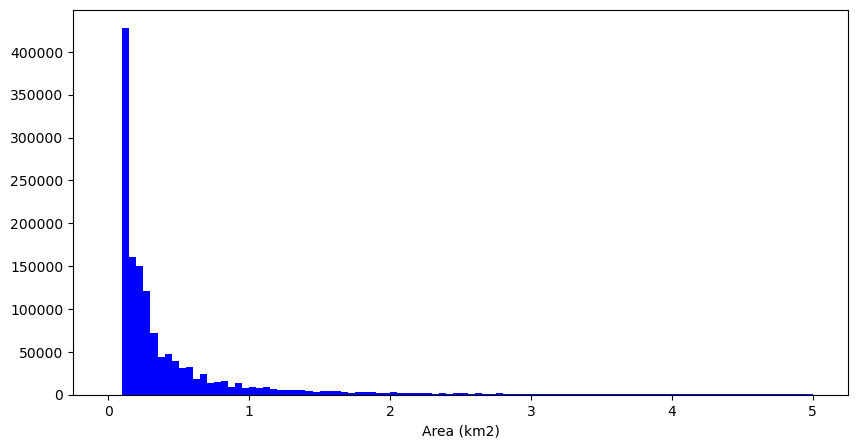

In [18]:
### histogram statistic
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.hist(lakes_gpd['Lake_area'], bins=100, facecolor='blue', range=[0, 5]);
ax.set_xlabel('Area (km2)')


Text(0.5, 0, 'Lakes mean elevation (m)')

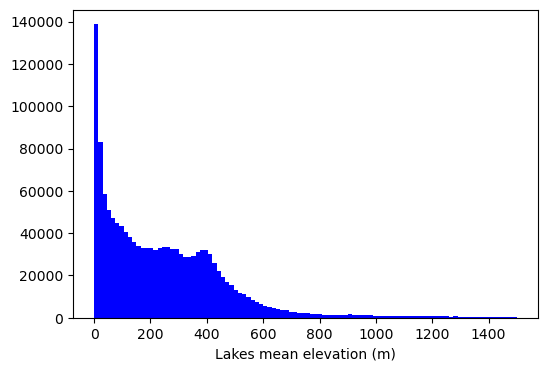

In [20]:
### histogram statistic for glacier elevation
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.hist(lakes_gpd['Elevation'], bins=100, facecolor='blue', range=[0, 1500]);
ax.set_xlabel('Lakes mean elevation (m)')


1. quantity and area

In [9]:
### Lakes selection: lakes larger than 1km2
ids_le_1 = np.where(lakes_gpd['Lake_area']>1)[0]
percent_le1 = lakes_gpd['Lake_area'][ids_le_1].sum()/lakes_gpd['Lake_area'].sum()
print('Number of lakes larger than 1km2:', ids_le_1.shape[0])
print('Number percentage of selected lakes:', ids_le_1.shape[0])
print('Area percentage of selected lakes: %.2f %%' % (percent_le1*100) )

Number of lakes larger than 1km2: 183277
Number percentage of selected lakes: 183277
Area percentage of selected lakes: 88.01 %


2. Lakes selection   
2.1 select the lakes with area lager than 1 km2.


In [10]:
### Select lakes with area lager than 1 km2
lakes_gpd_sel = lakes_gpd.loc[ids_le_1,:]


<GeoAxes: >

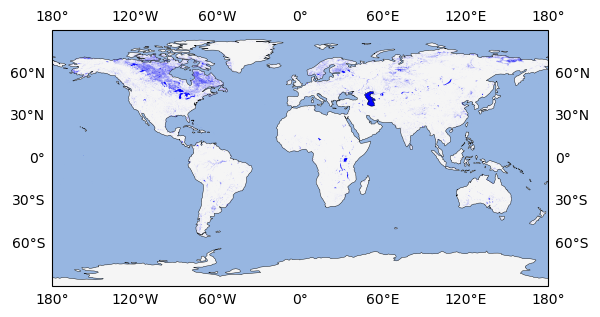

In [11]:
ax = plt.axes(projection=proj)
add_basemap(ax=ax)
lakes_gpd_sel.plot(ax=ax, facecolor='blue')


2.2 select the top 20 largest lakes.
 

In [12]:
lakes_gpd_ = lakes_gpd.sort_values(by='Lake_area', ascending=False)
lakes_gpd_largest20 = lakes_gpd_.head(20)


In [13]:
area_percent = lakes_gpd_largest20['Lake_area'].sum()/lakes_gpd['Lake_area'].sum()
print('percentage of the largest 20 lakes: %.2f%%' % (area_percent*100))


percentage of the largest 20 lakes: 33.39%


<GeoAxes: >

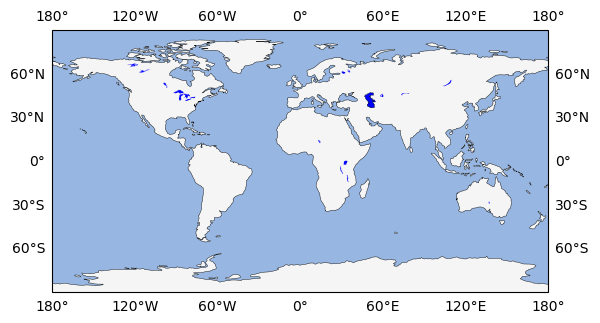

In [14]:
ax = plt.axes(projection=proj)
add_basemap(ax=ax)
lakes_gpd_largest20.plot(ax=ax, facecolor='blue')
